In [1]:
import pandas as pd
from fedot import Fedot
from fedot.core.data.data import InputData
from fedot.core.repository.tasks import Task, TaskTypesEnum
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.data.data_split import train_test_data_setup

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
train_data_path = '/Users/vadim/Desktop/FEDOT Intro/playground-series-s4e5/train.csv'
test_data_path = '/Users/vadim/Desktop/FEDOT Intro/playground-series-s4e5/test.csv'

df = pd.read_csv(train_data_path)
df_1000 = df[::100]
data = InputData.from_dataframe(df_1000.drop('FloodProbability', axis=1),
                                df_1000.FloodProbability,
                                task=Task(TaskTypesEnum.classification),
                                data_type=DataTypesEnum.table
                               )
train, test = train_test_data_setup(data)

При использовании для обучения полного доступного датасета создание модели заканчивается ошибкой. Были проведены несколько эскпериментов с размером обучающего датасета
- При использовании части датасета (начиная с 1/6) - всё нормально
- Чем меньше данных используется (1/10, 1/100, 1/1000), тем сложнее получается пайплайн
- При использовании для обучения 1/100 датасета уже "максимально autoML-ное" решение дает относительно неплохой результат (r2_score = 0.84)

## Почти максимально automl'но:

In [3]:
%%time
model = Fedot(problem='regression', seed=42, logging_level=10)
pipeline = model.fit(train)

2024-10-07 16:11:49,262 - deprecate positional args: graphviz.backend.piping.pipe(['renderer', 'formatter', 'neato_no_op', 'quiet'])
2024-10-07 16:11:49,264 - deprecate positional args: graphviz.backend.rendering.render(['renderer', 'formatter', 'neato_no_op', 'quiet'])
2024-10-07 16:11:49,265 - deprecate positional args: graphviz.backend.unflattening.unflatten(['stagger', 'fanout', 'chain', 'encoding'])
2024-10-07 16:11:49,267 - deprecate positional args: graphviz.backend.viewing.view(['quiet'])
2024-10-07 16:11:49,275 - deprecate positional args: graphviz.quoting.quote(['is_html_string', 'is_valid_id', 'dot_keywords', 'endswith_odd_number_of_backslashes', 'escape_unescaped_quotes'])
2024-10-07 16:11:49,276 - deprecate positional args: graphviz.quoting.a_list(['kwargs', 'attributes'])
2024-10-07 16:11:49,278 - deprecate positional args: graphviz.quoting.attr_list(['kwargs', 'attributes'])
2024-10-07 16:11:49,279 - deprecate positional args: graphviz.dot.Dot.clear(['keep_attrs'])
2024-

2024-10-07 16:12:05,323 - type - Random State: numpy.random.get_state() follows...
('MT19937', array([        42, 3107752595, 1895908407, 3900362577, 3030691166,
       4081230161, 2732361568, 1361238961, 3961642104,  867618704,
       2837705690, 3281374275, 3928479052, 3691474744, 3088217429,
       1769265762, 3769508895, 2731227933, 2930436685,  486258750,
       1452990090, 3321835500, 3520974945, 2343938241,  928051207,
       2811458012, 3391994544, 3688461242, 1372039449, 3706424981,
       1717012300, 1728812672, 1688496645, 1203107765, 1648758310,
        440890502, 1396092674,  626042708, 3853121610,  669844980,
       2992565612,  310741647, 3820958101, 3474052697,  305511342,
       2053450195,  705225224, 3836704087, 3293527636, 1140926340,
       2738734251,  574359520, 1493564308,  269614846,  427919468,
       2903547603, 2957214125,  181522756, 4137743374, 2557886044,
       3399018834, 1348953650, 1575066973, 3837612427,  705360616,
       4138204617, 1604205300, 160

2024-10-07 16:12:05,324 - ApiComposer - Pipeline composition started.
2024-10-07 16:12:05,325 - DataSourceSplitter - Stratificated splitting of data is disabled.
2024-10-07 16:12:05,325 - DataSourceSplitter - K-folds cross validation is applied.


Generations:   0%|                                   | 0/10000 [00:00<?, ?gen/s]

2024-10-07 16:12:05,358 - MultiprocessingDispatcher - Number of used CPU's: 8
2024-10-07 16:12:09,777 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2024-10-07 16:12:09,777 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2024-10-07 16:12:28,245 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2024-10-07 16:12:28,254 - EvoGraphOptimizer - Generation num: 1 size: 2
2024-10-07 16:12:28,254 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2024-10-07 16:12:28,383 - GraphVerifier - Graph verification failed with error <Invalid pipeline configuration: Root operation is not a model> for rul

Generations:   0%|                                   | 0/10000 [03:57<?, ?gen/s]

2024-10-07 16:16:03,329 - OptimisationTimer - Composition time: 3.967 min
2024-10-07 16:16:03,330 - OptimisationTimer - Algorithm was terminated due to processing time limit
2024-10-07 16:16:03,333 - EvoGraphOptimizer - Generation num: 3 size: 1
2024-10-07 16:16:03,334 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.300>']
2024-10-07 16:16:03,334 - EvoGraphOptimizer - no improvements for 1 iterations
2024-10-07 16:16:03,335 - EvoGraphOptimizer - spent time: 4.0 min
2024-10-07 16:16:03,338 - GPComposer - GP composition finished
2024-10-07 16:16:03,347 - DataSourceSplitter - Stratificated splitting of data is disabled.
2024-10-07 16:16:03,348 - DataSourceSplitter - K-folds cross validation is applied.
2024-10-07 16:16:03,348 - ApiComposer - Hyperparameters tuning started with 1 min. timeout
2024-10-07 16:16:03,350 - SimultaneousTuner - Hyperparameters optimization start: estimation of metric for initial graph
2024-10-07 16:16:03,352 - P

2024-10-07 16:16:04,014 - PipelineNode - Obtain prediction in pipeline node by operation: ridge
2024-10-07 16:16:04,016 - PipelineNode - Fit all parent nodes in secondary node with operation: ridge
2024-10-07 16:16:04,023 - PipelineNode - Obtain prediction in pipeline node by operation: isolation_forest_reg
2024-10-07 16:16:04,026 - PipelineNode - Fit all parent nodes in secondary node with operation: isolation_forest_reg
2024-10-07 16:16:04,032 - PipelineNode - Obtain prediction in pipeline node by operation: scaling
2024-10-07 16:16:04,057 - PipelineNode - Trying to fit pipeline node with operation: ridge
2024-10-07 16:16:04,063 - PipelineNode - Fit all parent nodes in secondary node with operation: ridge
2024-10-07 16:16:04,067 - PipelineNode - Trying to fit pipeline node with operation: isolation_forest_reg
2024-10-07 16:16:04,074 - PipelineNode - Fit all parent nodes in secondary node with operation: isolation_forest_reg
2024-10-07 16:16:04,079 - PipelineNode - Trying to fit pipel

2024-10-07 16:16:10,284 - PipelineNode - Obtain prediction in pipeline node by operation: isolation_forest_reg
2024-10-07 16:16:10,290 - PipelineNode - Fit all parent nodes in secondary node with operation: isolation_forest_reg
2024-10-07 16:16:10,295 - PipelineNode - Obtain prediction in pipeline node by operation: scaling
2024-10-07 16:16:10,329 - PipelineNode - Trying to fit pipeline node with operation: ridge
2024-10-07 16:16:10,332 - PipelineNode - Fit all parent nodes in secondary node with operation: ridge
2024-10-07 16:16:10,336 - PipelineNode - Trying to fit pipeline node with operation: isolation_forest_reg
2024-10-07 16:16:10,340 - PipelineNode - Fit all parent nodes in secondary node with operation: isolation_forest_reg
2024-10-07 16:16:10,347 - PipelineNode - Trying to fit pipeline node with operation: scaling
2024-10-07 16:16:11,272 - PipelineNode - Obtain prediction in pipeline node by operation: ridge
2024-10-07 16:16:11,274 - PipelineNode - Fit all parent nodes in seco

2024-10-07 16:16:17,228 - PipelineNode - Obtain prediction in pipeline node by operation: scaling
2024-10-07 16:16:17,245 - PipelineObjectiveEvaluate - Pipeline ((/n_scaling;)/n_isolation_forest_reg_{'bootstrap': True, 'max_features': 0.8535499965013956, 'max_samples': 0.09446223892221475};)/n_ridge_{'alpha': 3.4889082758008847} with evaluated metrics: (0.020213909677840772,)
2024-10-07 16:16:17,249 - No progress made: 2 iteration on 3162. best_loss=0.02, best_loss_threshold=0.02, new_loss=0.02
  0%| | 2/100000 [00:09<136:46:49,  4.92s/trial, best loss: 0.0202098230503606622024-10-07 16:16:17,266 - build_posterior_wrapper took 0.004603 seconds
2024-10-07 16:16:17,271 - TPE using 2/2 trials with best loss 0.020210
2024-10-07 16:16:17,282 - PipelineObjectiveEvaluate - Pipeline ((/n_scaling;)/n_isolation_forest_reg_{'bootstrap': True, 'max_features': 0.19762185988366937, 'max_samples': 0.8200797820120105};)/n_ridge_{'alpha': 5.367741193830335} fit started
2024-10-07 16:16:17,294 - Pipelin

2024-10-07 16:16:23,101 - PipelineNode - Fit all parent nodes in secondary node with operation: isolation_forest_reg
2024-10-07 16:16:23,104 - PipelineNode - Trying to fit pipeline node with operation: scaling
2024-10-07 16:16:23,981 - PipelineNode - Obtain prediction in pipeline node by operation: ridge
2024-10-07 16:16:23,983 - PipelineNode - Fit all parent nodes in secondary node with operation: ridge
2024-10-07 16:16:23,986 - PipelineNode - Obtain prediction in pipeline node by operation: isolation_forest_reg
2024-10-07 16:16:23,988 - PipelineNode - Fit all parent nodes in secondary node with operation: isolation_forest_reg
2024-10-07 16:16:23,990 - PipelineNode - Obtain prediction in pipeline node by operation: scaling
2024-10-07 16:16:24,015 - PipelineNode - Trying to fit pipeline node with operation: ridge
2024-10-07 16:16:24,017 - PipelineNode - Fit all parent nodes in secondary node with operation: ridge
2024-10-07 16:16:24,018 - PipelineNode - Trying to fit pipeline node with

2024-10-07 16:16:29,485 - PipelineNode - Trying to fit pipeline node with operation: scaling
2024-10-07 16:16:30,337 - PipelineNode - Obtain prediction in pipeline node by operation: ridge
2024-10-07 16:16:30,339 - PipelineNode - Fit all parent nodes in secondary node with operation: ridge
2024-10-07 16:16:30,344 - PipelineNode - Obtain prediction in pipeline node by operation: isolation_forest_reg
2024-10-07 16:16:30,348 - PipelineNode - Fit all parent nodes in secondary node with operation: isolation_forest_reg
2024-10-07 16:16:30,356 - PipelineNode - Obtain prediction in pipeline node by operation: scaling
2024-10-07 16:16:30,379 - PipelineNode - Trying to fit pipeline node with operation: ridge
2024-10-07 16:16:30,382 - PipelineNode - Fit all parent nodes in secondary node with operation: ridge
2024-10-07 16:16:30,384 - PipelineNode - Trying to fit pipeline node with operation: isolation_forest_reg
2024-10-07 16:16:30,389 - PipelineNode - Fit all parent nodes in secondary node with

2024-10-07 16:16:35,638 - TPE using 6/6 trials with best loss 0.020206
2024-10-07 16:16:35,647 - PipelineObjectiveEvaluate - Pipeline ((/n_scaling;)/n_isolation_forest_reg_{'bootstrap': True, 'max_features': 0.6985151094686796, 'max_samples': 0.47985595170315004};)/n_ridge_{'alpha': 6.006492482748665} fit started
2024-10-07 16:16:35,655 - PipelineNode - Trying to fit pipeline node with operation: ridge
2024-10-07 16:16:35,659 - PipelineNode - Fit all parent nodes in secondary node with operation: ridge
2024-10-07 16:16:35,662 - PipelineNode - Trying to fit pipeline node with operation: isolation_forest_reg
2024-10-07 16:16:35,664 - PipelineNode - Fit all parent nodes in secondary node with operation: isolation_forest_reg
2024-10-07 16:16:35,666 - PipelineNode - Trying to fit pipeline node with operation: scaling
2024-10-07 16:16:36,523 - PipelineNode - Obtain prediction in pipeline node by operation: ridge
2024-10-07 16:16:36,524 - PipelineNode - Fit all parent nodes in secondary node 

2024-10-07 16:16:42,041 - PipelineNode - Fit all parent nodes in secondary node with operation: isolation_forest_reg
2024-10-07 16:16:42,043 - PipelineNode - Obtain prediction in pipeline node by operation: scaling
2024-10-07 16:16:42,064 - PipelineNode - Trying to fit pipeline node with operation: ridge
2024-10-07 16:16:42,067 - PipelineNode - Fit all parent nodes in secondary node with operation: ridge
2024-10-07 16:16:42,069 - PipelineNode - Trying to fit pipeline node with operation: isolation_forest_reg
2024-10-07 16:16:42,071 - PipelineNode - Fit all parent nodes in secondary node with operation: isolation_forest_reg
2024-10-07 16:16:42,074 - PipelineNode - Trying to fit pipeline node with operation: scaling
2024-10-07 16:16:42,912 - PipelineNode - Obtain prediction in pipeline node by operation: ridge
2024-10-07 16:16:42,914 - PipelineNode - Fit all parent nodes in secondary node with operation: ridge
2024-10-07 16:16:42,920 - PipelineNode - Obtain prediction in pipeline node by

2024-10-07 16:16:48,580 - PipelineNode - Obtain prediction in pipeline node by operation: scaling
2024-10-07 16:16:48,605 - PipelineNode - Trying to fit pipeline node with operation: ridge
2024-10-07 16:16:48,610 - PipelineNode - Fit all parent nodes in secondary node with operation: ridge
2024-10-07 16:16:48,615 - PipelineNode - Trying to fit pipeline node with operation: isolation_forest_reg
2024-10-07 16:16:48,618 - PipelineNode - Fit all parent nodes in secondary node with operation: isolation_forest_reg
2024-10-07 16:16:48,620 - PipelineNode - Trying to fit pipeline node with operation: scaling
2024-10-07 16:16:49,459 - PipelineNode - Obtain prediction in pipeline node by operation: ridge
2024-10-07 16:16:49,468 - PipelineNode - Fit all parent nodes in secondary node with operation: ridge
2024-10-07 16:16:49,478 - PipelineNode - Obtain prediction in pipeline node by operation: isolation_forest_reg
2024-10-07 16:16:49,488 - PipelineNode - Fit all parent nodes in secondary node with

2024-10-07 16:16:53,895 - PipelineNode - Trying to fit pipeline node with operation: isolation_forest_reg
2024-10-07 16:16:53,898 - PipelineNode - Fit all parent nodes in secondary node with operation: isolation_forest_reg
2024-10-07 16:16:53,899 - PipelineNode - Trying to fit pipeline node with operation: scaling
2024-10-07 16:16:54,701 - PipelineNode - Obtain prediction in pipeline node by operation: ridge
2024-10-07 16:16:54,703 - PipelineNode - Fit all parent nodes in secondary node with operation: ridge
2024-10-07 16:16:54,708 - PipelineNode - Obtain prediction in pipeline node by operation: isolation_forest_reg
2024-10-07 16:16:54,717 - PipelineNode - Fit all parent nodes in secondary node with operation: isolation_forest_reg
2024-10-07 16:16:54,726 - PipelineNode - Obtain prediction in pipeline node by operation: scaling
2024-10-07 16:16:54,754 - PipelineNode - Trying to fit pipeline node with operation: ridge
2024-10-07 16:16:54,755 - PipelineNode - Fit all parent nodes in seco

2024-10-07 16:17:00,051 - PipelineNode - Trying to fit pipeline node with operation: scaling
2024-10-07 16:17:00,870 - PipelineNode - Obtain prediction in pipeline node by operation: ridge
2024-10-07 16:17:00,872 - PipelineNode - Fit all parent nodes in secondary node with operation: ridge
2024-10-07 16:17:00,881 - PipelineNode - Obtain prediction in pipeline node by operation: isolation_forest_reg
2024-10-07 16:17:00,887 - PipelineNode - Fit all parent nodes in secondary node with operation: isolation_forest_reg
2024-10-07 16:17:00,892 - PipelineNode - Obtain prediction in pipeline node by operation: scaling
2024-10-07 16:17:00,933 - PipelineNode - Trying to fit pipeline node with operation: ridge
2024-10-07 16:17:00,936 - PipelineNode - Fit all parent nodes in secondary node with operation: ridge
2024-10-07 16:17:00,939 - PipelineNode - Trying to fit pipeline node with operation: isolation_forest_reg
2024-10-07 16:17:00,945 - PipelineNode - Fit all parent nodes in secondary node with

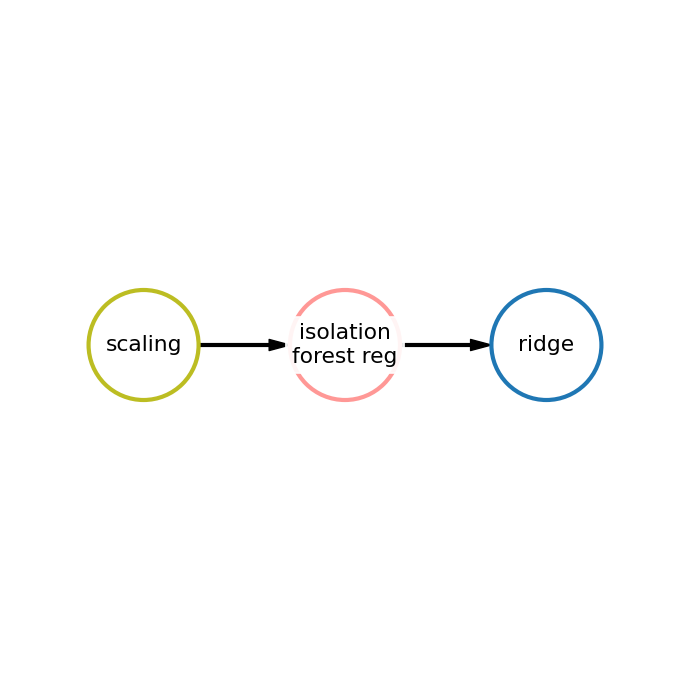

In [8]:
pipeline.show()

In [5]:
prediction = model.predict(test)
prediction

2024-10-07 16:17:04,333 - PipelineNode - Obtain prediction in pipeline node by operation: ridge
2024-10-07 16:17:04,333 - PipelineNode - Fit all parent nodes in secondary node with operation: ridge
2024-10-07 16:17:04,335 - PipelineNode - Obtain prediction in pipeline node by operation: isolation_forest_reg
2024-10-07 16:17:04,335 - PipelineNode - Fit all parent nodes in secondary node with operation: isolation_forest_reg
2024-10-07 16:17:04,336 - PipelineNode - Obtain prediction in pipeline node by operation: scaling


array([[0.50512764],
       [0.52203229],
       [0.49488822],
       ...,
       [0.51128713],
       [0.45984455],
       [0.52329608]])

In [6]:
print(model.get_metrics(rounding_order=4))

2024-10-07 16:17:04,374 - PipelineObjectiveEvaluate - Pipeline ((/n_scaling;)/n_isolation_forest_reg;)/n_ridge fit started
2024-10-07 16:17:04,385 - PipelineNode - Obtain prediction in pipeline node by operation: ridge
2024-10-07 16:17:04,386 - PipelineNode - Fit all parent nodes in secondary node with operation: ridge
2024-10-07 16:17:04,386 - PipelineNode - Obtain prediction in pipeline node by operation: isolation_forest_reg
2024-10-07 16:17:04,389 - PipelineNode - Fit all parent nodes in secondary node with operation: isolation_forest_reg
2024-10-07 16:17:04,399 - PipelineNode - Obtain prediction in pipeline node by operation: scaling
2024-10-07 16:17:04,413 - PipelineObjectiveEvaluate - Pipeline ((/n_scaling;)/n_isolation_forest_reg;)/n_ridge with evaluated metrics: (0.020509618882865354,)
{'rmse': 0.0205}


In [9]:
# метрика модели, обученной на 1/100 тренировочного датасета
r2_score_100 = r2_score(test.target, prediction)
print(r2_score_100)

0.8412040554946549


In [10]:
new_data = pd.read_csv(test_data_path)
prediction = model.predict(new_data)
prediction

2024-10-07 16:17:46,228 - PipelineNode - Obtain prediction in pipeline node by operation: ridge
2024-10-07 16:17:46,228 - PipelineNode - Fit all parent nodes in secondary node with operation: ridge
2024-10-07 16:17:46,229 - PipelineNode - Obtain prediction in pipeline node by operation: isolation_forest_reg
2024-10-07 16:17:46,229 - PipelineNode - Fit all parent nodes in secondary node with operation: isolation_forest_reg
2024-10-07 16:17:46,229 - PipelineNode - Obtain prediction in pipeline node by operation: scaling


array([[0.5734213 ],
       [0.45524497],
       [0.45590753],
       ...,
       [0.62304803],
       [0.55094096],
       [0.51110609]])

In [11]:
new_data['FloodProbability'] = prediction
new_data = new_data[['id', 'FloodProbability']]
#columns_to_drop = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
#       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
#       'Siltation', 'AgriculturalPractices', 'Encroachments',
#       'IneffectiveDisasterPreparedness', 'DrainageSystems',
#       'CoastalVulnerability', 'Landslides', 'Watersheds',
#       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
#       'InadequatePlanning', 'PoliticalFactors']
#new_data.drop(columns_to_drop, axis=1, inplace=True)
new_data

,id,FloodProbability
0,1117957,0.573421
1,1117958,0.455245
2,1117959,0.455908
3,1117960,0.465554
4,1117961,0.466076
...,...,...
745300,1863257,0.478347
745301,1863258,0.449202
745302,1863259,0.623048
745303,1863260,0.550941


In [12]:
new_data.to_csv('/Users/vadim/Desktop/FEDOT Intro/playground-series-s4e5/submission_1.3.csv', index=False)